# Dataset personal_train.csv
#### Anton Rusňák, František Gič

In [158]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
%matplotlib inline

data = pd.read_csv("data/personal_train.csv",sep=",")

### Opis dát:

Dataset obsahuje informácie o osobách, ich adresu bydliska, vek, pohlavie a dátum narodenia.<br>
Obsahuje 3932 záznamov (riadkov okrem hlavicky) a 6 atribútov.

In [159]:
data.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",59,Male,1960-07-04
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",47,Female,1972-07-20
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",59,Male,1960-02-28
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",51,Female,1967-12-04
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",NaN,Female,1938-04-22


In [160]:
print('Počet stĺpcov : ',data.shape[1] , '\nPočet riadkov: ', data.shape[0])

Počet stĺpcov :  6 
Počet riadkov:  3933


Z výpisu Dataframe.head() je jasné, že prvý, nepomenovaný atribút je v datasete použitý ako index, preto ho môžme odstrániť.

In [161]:
data = data.drop(data.columns[0],axis=1)

## Opis atribútov:
Atribúty datasetu sú reťazce (stringy), aj keď by tam v niektorých atribútoch logicky mali byť iné typy - napríklad čísla pre atribút age alebo typ date s ISO štandardom pre dátum narodenia. 

In [162]:
data.dtypes

name             object
address          object
age              object
sex              object
date_of_birth    object
dtype: object

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 5 columns):
name             3933 non-null object
address          3933 non-null object
age              3343 non-null object
sex              3933 non-null object
date_of_birth    3933 non-null object
dtypes: object(5)
memory usage: 153.7+ KB


Dataset taktiež obsahuje celkom veľa chýbajúcich hodnôt.<br>
Z výpisu je možné vidieť, že nie všetky atribúty obsahujú hodnoty.

In [164]:
data.shape[0] - data.dropna().shape[0]

590

In [165]:
data.isnull().sum()

name               0
address            0
age              590
sex                0
date_of_birth      0
dtype: int64

Konkrétne, hodnota atribútu age chýba v 590 záznamoch, čo však implicitne neznamená, že v záznamoch nemáme aj nejaké iné ako číselné hodnoty.

## Deskriptívne štatistiky 

In [166]:
data.describe(include="all")

,name,address,age,sex,date_of_birth
count,3933,3933,3343,3933,3933
unique,3933,3933,94,2,3694
top,James Smith,"PSC 2887, Box 9837\r\nAPO AA 93784",53,Male,1961-09-10
freq,1,1,120,2655,3


## Opis atribútov a identifikácia chýb:

Atribút **age**
 - je to spojitý atribút
 - v datasete obsahuje prázdne hodnoty, záporné hodnoty, a aj whitespace znaky
 - je typu typ string (object)

Zaujímavé by sa bolo pozrieť napríklad na jeho maximum, minimum a medián preto dropneme všetky nečíselné hodnoty aby sme mohli vykonávať deskriptívnu štatistiku tohto atribútu.

In [167]:
data.age = pd.to_numeric(data.age, errors="coerce").dropna().astype(int)
data.describe()

,age
count,3191.000000
mean,51.971482
std,11.711640
min,-1.000000
25%,45.000000
50%,52.000000
75%,60.000000
max,99.000000


Po dropnutí prázdnych riadkov a nečíselných hodnôt môžme vidieť vcelku zaujímavé hodnoty - napríklad záporné minimum, čo je outlier a s najväčšou pravdepodobnosťou zlá hodnota.


Taktiež sme si teda všimli že máme dosť veľký počet prázdnych hodnôt - korekciou by mohlo byť napríklad dopočítanie veku na základe dátumu narodenia.

In [168]:
print('Pocet chybajucich zaznamov : ',data.age.shape[0] - data.age.dropna().shape[0])

Pocet chybajucich zaznamov :  742


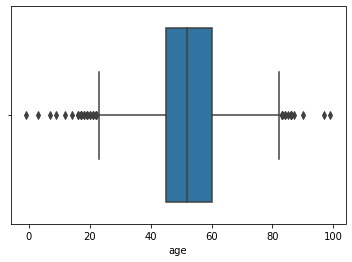

In [169]:
sns.boxplot(data.age)

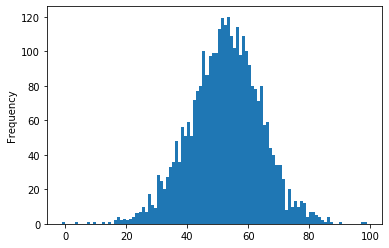

In [170]:
data.age.plot(kind='hist', bins=100)


In [171]:
def reload_data():
    """Reloads the data from CSV file"""
    return pd.read_csv("data/personal_train.csv",sep=",",index_col=0)
    
data = reload_data()

Atribút **sex**
- je typu string 
- je to kategorický nominálny atribút, nadobúda len dve hodnoty: Male (muz) alebo Female (zena)
- všetky hodnoty su prítomné

In [172]:
data.sex.describe()


count      3933
unique        2
top        Male
freq       2655
Name: sex, dtype: object

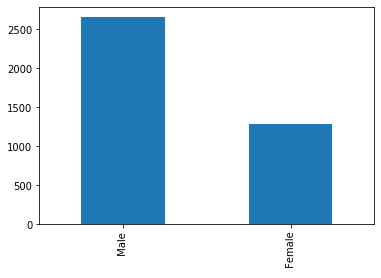

In [173]:
data.sex.value_counts().plot.bar()

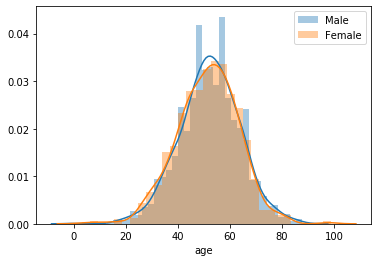

In [174]:
sns.distplot(pd.to_numeric(data[data.sex.str.strip() == 'Male'].age, errors="coerce").dropna().astype(int),label="Male")
sns.distplot(pd.to_numeric(data[data.sex.str.strip() == 'Female'].age, errors="coerce").dropna().astype(int),label="Female")
plt.legend()
plt.show()

Z grafov môžme vidieť, že v našom datasete prevládajú muží - je ich viac ako dvojnásobok žien.<br>
Z distplotu je taktiež možné vyčítať že pri oboch pohlaviách prevládajú jedinci s vekom okolo 50tky, pri ženách je vek o pár rokov vyšší.
 

Atribút **date_of_birth**
- je to spojitý intervalový atribút
- m8 typ string 
- všetky hodnoty sú prítomné
- avšak dáta majú nejednotný formát zápisu
- nachádza sa tu viacero ISO štandardov, s dátumy časom (YYYY-MM-DD hh:mm:ss), dátumy nejednotne oddelené (lomítkami alebo pomlčkami) alebo roky bez prvých dvoch čísel (63-05-18)
- bude teda nutné tieto formáty zjednotiť do jedného

In [175]:
data['date_of_birth'].describe()

count           3933
unique          3694
top       1961-09-10
freq               3
Name: date_of_birth, dtype: object

In [176]:
data['date_of_birth'].unique()

array(['1960-07-04', '1972-07-20', '1960-02-28', ..., '1969-08-27',
       '1960-10-29', '1951-02-14'], dtype=object)

In [177]:
print('Pocet chybajucich zaznamov : ',data['date_of_birth'].shape[0] - data['date_of_birth'].dropna().shape[0])

Pocet chybajucich zaznamov :  0


## Riešenie chybných a problematických údajov
Atribút age
 - bude nutné prekonvertovať hodnoty v stringu na integer a
 všetky hodnoty ktore neudavajú vek, buď dopočítať na základe atribútu date_of_birth alebo ak to nebude možné tak nastaviť na priemerný vek - vypočítal by sa z hodnôt s ktorými sa da pracovať
 
Atribút date_of_birth
 - prekovertovanie dát do typu date alebo datetime pre lepšie spracovanie v grafoch a ujednotnenie štandardu v ktorom sa dátum udáva